Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
#import data: miami_bikes.csv and yelp_data.csv
#Preview dataframes with df.head()

miami_bikes = pd.read_csv('../data/miami_bikes.csv')
miami_bikes.head()

yelp_data = pd.read_csv('../data/yelp_data.csv')
yelp_data.head()

,name,review_count,rating,price,distance,category_1,category_2,category_3,yelp_bike_station_coordinates
0,Asian Thai Kitchen,237,4.0,$$,280.048258,Food Delivery Services,Thai,Thai,"25.729275,-80.241581"
1,Loretta & The Butcher,224,4.5,$$$,343.398505,Argentine,Breakfast & Brunch,Breakfast & Brunch,"25.729275,-80.241581"
2,Fireman Derek’s Bake Shop,254,4.5,$$,257.370490,Desserts,Bakeries,Bakeries,"25.729275,-80.241581"
3,Le Pain Quotidien,237,4.0,$$,237.898851,Cafes,Bakeries,Bakeries,"25.729275,-80.241581"
4,Salt and Straw,160,4.5,$$,115.219169,Ice Cream & Frozen Yogurt,Desserts,Desserts,"25.729275,-80.241581"


In [8]:
#Iterate through each bike station from miami_bikes.csv
# Iterate through rows using iterrows()
def append_coordinates(df):
    Bike_Station_Coordinates = []
    for index, row in df.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        Bike_Station_Coordinates.append((latitude, longitude))
    return Bike_Station_Coordinates
        
Bike_Station_Coordinates = append_coordinates(miami_bikes)
print(len(Bike_Station_Coordinates))

166


In [9]:
#add bike station coordinates to miami_bikes
miami_bikes["station_coordinates"] = Bike_Station_Coordinates

In [10]:
miami_bikes.head()

,latitude,longitude,bikes,station_coordinates
0,25.729275,-80.241581,3,"(25.729275, -80.241581)"
1,25.732522,-80.233244,3,"(25.732522, -80.233244)"
2,25.751100,-80.202641,4,"(25.7511, -80.202641)"
3,25.760082,-80.196217,2,"(25.760082, -80.196217)"
4,25.761884,-80.193101,1,"(25.761884, -80.193101)"


In [11]:
#Print how the dataframe looks when filtering for 1 coordinate
print(miami_bikes.loc[miami_bikes['station_coordinates'] == (25.729275,-80.241581)])

    latitude  longitude  bikes      station_coordinates
0  25.729275 -80.241581      3  (25.729275, -80.241581)


In [12]:
#join yelp_data with miami_bikes
#Iterate through each row from yelp_data.csv

def join_df(df): 
    free_bikes= []
    # Add an empty column in the yelp_data dataframe
    yelp_data['bikes'] = None
    for index, row in yelp_data.iterrows():
        bike_coordinates = row['yelp_bike_station_coordinates']
        latitude, longitude = bike_coordinates.split(',')
        formatted_value = (float(latitude), float(longitude))
        bikes = miami_bikes.loc[miami_bikes['station_coordinates'] == formatted_value]['bikes'].values[0]
        # update the df at the current index
        yelp_data.at[index, 'bikes'] = bikes
    #     free_bikes.append(bikes)
    return yelp_data

yelp_data = join_df(yelp_data)

yelp_data.head()

,name,review_count,rating,price,distance,category_1,category_2,category_3,yelp_bike_station_coordinates,bikes
0,Asian Thai Kitchen,237,4.0,$$,280.048258,Food Delivery Services,Thai,Thai,"25.729275,-80.241581",3
1,Loretta & The Butcher,224,4.5,$$$,343.398505,Argentine,Breakfast & Brunch,Breakfast & Brunch,"25.729275,-80.241581",3
2,Fireman Derek’s Bake Shop,254,4.5,$$,257.370490,Desserts,Bakeries,Bakeries,"25.729275,-80.241581",3
3,Le Pain Quotidien,237,4.0,$$,237.898851,Cafes,Bakeries,Bakeries,"25.729275,-80.241581",3
4,Salt and Straw,160,4.5,$$,115.219169,Ice Cream & Frozen Yogurt,Desserts,Desserts,"25.729275,-80.241581",3


In [13]:
#QA test: Check to ensure that the number of bikes matches the station that was provided on miami_bikes.csv
#Expecting 20 bikes
station1 = yelp_data.loc[yelp_data['yelp_bike_station_coordinates']== '25.765327,-80.131324']
station1

,name,review_count,rating,price,distance,category_1,category_2,category_3,yelp_bike_station_coordinates,bikes
853,Gelato-go South Beach,354,4.5,$$,1001.214524,Gelato,Coffee & Tea,Coffee & Tea,"25.765327,-80.131324",20
854,Prima Classe,38,4.5,$,730.353091,Cafes,Specialty Food,Specialty Food,"25.765327,-80.131324",20
855,Häagen-Dazs,24,4.0,$$,339.019591,Ice Cream & Frozen Yogurt,Juice Bars & Smoothies,Juice Bars & Smoothies,"25.765327,-80.131324",20
856,Gelateria 4D,72,3.5,$$,443.309270,Gelato,NaN,NaN,"25.765327,-80.131324",20
857,Smoothie Spot - South Beach,60,4.0,$$,1022.843960,Wraps,Juice Bars & Smoothies,Juice Bars & Smoothies,"25.765327,-80.131324",20
858,La Playa Supermarket,41,4.5,$,740.780327,Grocery,NaN,NaN,"25.765327,-80.131324",20
859,Portofino Wine Bank,14,3.5,$$,451.725845,"Beer, Wine & Spirits",NaN,NaN,"25.765327,-80.131324",20
860,SOBE Prime Tobacco,20,4.5,$$,621.158748,Tobacco Shops,Coffee & Tea,Coffee & Tea,"25.765327,-80.131324",20
861,Dreamer Acai Juice Matcha,33,3.0,$$,609.322495,Acai Bowls,Juice Bars & Smoothies,Juice Bars & Smoothies,"25.765327,-80.131324",20
862,STARBUCKS COFFEE,76,2.5,$$,603.430724,Coffee & Tea,NaN,NaN,"25.765327,-80.131324",20


In [14]:
yelp_data.head()

,name,review_count,rating,price,distance,category_1,category_2,category_3,yelp_bike_station_coordinates,bikes
0,Asian Thai Kitchen,237,4.0,$$,280.048258,Food Delivery Services,Thai,Thai,"25.729275,-80.241581",3
1,Loretta & The Butcher,224,4.5,$$$,343.398505,Argentine,Breakfast & Brunch,Breakfast & Brunch,"25.729275,-80.241581",3
2,Fireman Derek’s Bake Shop,254,4.5,$$,257.370490,Desserts,Bakeries,Bakeries,"25.729275,-80.241581",3
3,Le Pain Quotidien,237,4.0,$$,237.898851,Cafes,Bakeries,Bakeries,"25.729275,-80.241581",3
4,Salt and Straw,160,4.5,$$,115.219169,Ice Cream & Frozen Yogurt,Desserts,Desserts,"25.729275,-80.241581",3


In [15]:
#Make a list of remaining columns. 
print(yelp_data.columns)
print(yelp_data.dtypes)

#bikes column need to be changed into an interger 

Index(['name', 'review_count', 'rating', 'price', 'distance', 'category_1',
       'category_2', 'category_3', 'yelp_bike_station_coordinates', 'bikes'],
      dtype='object')
name                              object
review_count                       int64
rating                           float64
price                             object
distance                         float64
category_1                        object
category_2                        object
category_3                        object
yelp_bike_station_coordinates     object
bikes                             object
dtype: object


In [17]:
#Change $ to numbers from 1-4 
yelp_data.loc[yelp_data['price']=='$', 'price'] = '1' 
yelp_data.loc[yelp_data['price']=='$$', 'price'] = '2'
yelp_data.loc[yelp_data['price']=='$$$', 'price'] = '3'
yelp_data.loc[yelp_data['price']=='$$$$', 'price'] = '4'
yelp_data.head()

,name,review_count,rating,price,distance,category_1,category_2,category_3,yelp_bike_station_coordinates,bikes
0,Asian Thai Kitchen,237,4.0,2,280.048258,Food Delivery Services,Thai,Thai,"25.729275,-80.241581",3
1,Loretta & The Butcher,224,4.5,3,343.398505,Argentine,Breakfast & Brunch,Breakfast & Brunch,"25.729275,-80.241581",3
2,Fireman Derek’s Bake Shop,254,4.5,2,257.370490,Desserts,Bakeries,Bakeries,"25.729275,-80.241581",3
3,Le Pain Quotidien,237,4.0,2,237.898851,Cafes,Bakeries,Bakeries,"25.729275,-80.241581",3
4,Salt and Straw,160,4.5,2,115.219169,Ice Cream & Frozen Yogurt,Desserts,Desserts,"25.729275,-80.241581",3


In [16]:
#Change bikes datatype to interger
yelp_data_clean = yelp_data.astype({"bikes": int})

#confirm data type has been changed
print(yelp_data_clean.dtypes)

name                              object
review_count                       int64
rating                           float64
price                             object
distance                         float64
category_1                        object
category_2                        object
category_3                        object
yelp_bike_station_coordinates     object
bikes                              int32
dtype: object


In [17]:
#Within numerical columns, see how many NULL values are present
yelp_data_clean.isna().sum()

name                               0
review_count                       0
rating                             0
price                              0
distance                           0
category_1                         0
category_2                       398
category_3                       398
yelp_bike_station_coordinates      0
bikes                              0
dtype: int64

Only have null values in category 2 and 3. Some point of interests may only contain 1 category and may not have sub categories. Ok to keep null values. 

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

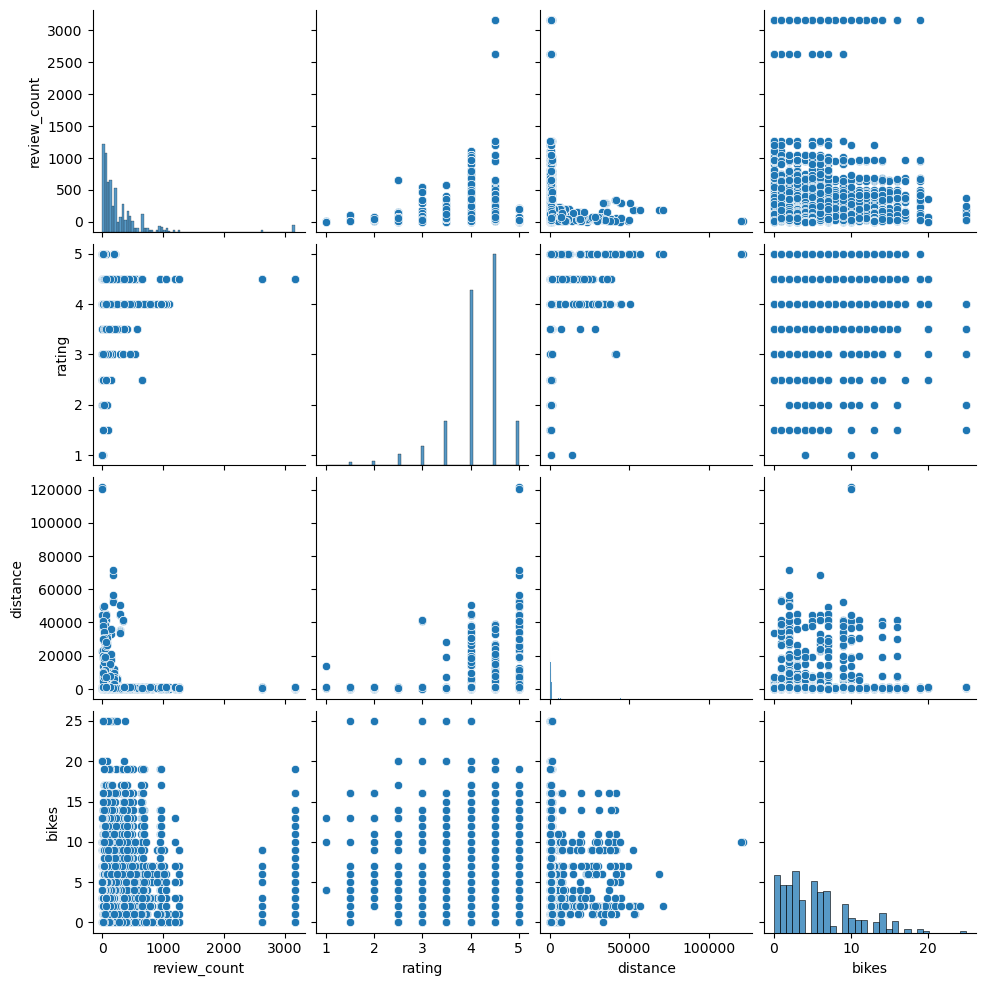

In [20]:
#Visualize data to see if there are any outliers within the dataset
sns.pairplot(yelp_data_clean, diag_kind="hist")

No significant correlations can be seen through the pairplots. 
Data seems to be in clusters in each graph. Do not follow any particular pattern. 
Few outliers were identified. In graph with rating vs. review_count a few outliers can be seen where review_count >2500 and rating is = 4.5. The distance graphs had a few outliers, where the distance >100000m. Bikes graph skewed to the right. 

In [21]:
#quick overview of statistics found in dataframe
yelp_data_clean.describe()

,review_count,rating,distance,bikes
count,3202.000000,3202.000000,3202.000000,3202.000000
mean,285.249844,4.145222,2441.237101,5.541537
std,431.930394,0.594274,7861.008148,4.651255
min,1.000000,1.000000,16.710029,0.000000
25%,63.000000,4.000000,331.825172,2.000000
50%,157.000000,4.000000,576.126907,5.000000
75%,359.000000,4.500000,905.170216,8.000000
max,3163.000000,5.000000,121415.061956,25.000000


*****Findings from EDA Process:

There is no obvious correlation that can be infered at through the pairplot or the df.describe function. Data seems to be forming clusters at the corners of the graph and do no follow any typical pattern.

Through the df.describe function may suggest outliers are present in the dataset.  

For both the distance and review_count columns, the difference between min and max very large, suggesting a large range in data. Outliers may be present as max for both columns exceeds 3 standard deviations of the mean. 

Outliers may be present in the dataset that may need to be removed when creating the final model. 

In [22]:
yelp_data_clean.to_csv('../data/final_miami_bikes_yelp.csv', index=False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [1]:
#import libraries
import sqlite3 as sq
import pandas as pd
from sqlalchemy import create_engine

In [5]:
#Writing df to sqlite

table_name = "miami_bikes_yelp"
table_name2 = "miami_stations"

sql_data = '..\data\miamibikes_yelp.sqlite' # creates a database called miamibikes in the data directory

conn = sq.connect(sql_data)

yelp_data.to_sql(table_name,conn, if_exists='replace',index=False)
miami_bikes.to_sql(table_name2,conn, if_exists='replace',index=False)
conn.close()

SQL join statement here:

--Create new column containing bike coordinates. 
--Concatenate latitude and longitude

ALTER TABLE miami_stations 
ADD bikes_coordinates VARCHAR(20) NULL;

UPDATE  miami_stations
SET bikes_coordinates = (latitude||','||longitude);


--Check to see that the column has been made properly
SELECT bikes_coordinates
FROM miami_stations;


--JOIN miami_stations table and miami_bikes_yelp table together using the bike coordinates
SELECT *, ms.bikes
FROM miami_bikes_yelp mb 
LEFT JOIN miami_stations ms    
ON mb.yelp_bike_station_coordinates = ms.bikes_coordinates;

Look at the data before and after the join to validate your data.

In [ ]:
print(yelp_data_clean.shape)

#Matches dimensions 